# Problem Statement

Global Mart is an online supergiant store that has worldwide operations. This store takes orders and delivers across the globe and deals with all the major product categories — consumer, corporate & home office.



As a sales manager for this store, you have to forecast the sales of the products for the next 6 months, so that you have a proper estimate and can plan your inventory and business processes accordingly.

In [ ]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

##  Import necessary libraries</font>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns



## 2. Import time series data: Global Superstore Data

In [ ]:
# Read the given CSV file, and view some sample records
retail= pd.read_csv('GlobalSuperstoreData.csv')
retail.head()

,Order Date,Segment,Market,Sales,Profit
0,31-07-2012,Consumer,US,2309.650,762.1845
1,05-02-2013,Corporate,APAC,3709.395,-288.7650
2,17-10-2013,Consumer,APAC,5175.171,919.9710
3,28-01-2013,Home Office,EU,2892.510,-96.5400
4,05-11-2013,Consumer,Africa,2832.960,311.5200


In [ ]:
#Determine the number of rows and columns
retail.shape

(51290, 5)

#### There are 51290 rows and 5 columns in the data set

In [ ]:
#Checking the datatypes
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Order Date  51290 non-null  object 
 1   Segment     51290 non-null  object 
 2   Market      51290 non-null  object 
 3   Sales       51290 non-null  float64
 4   Profit      51290 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.0+ MB


In [ ]:
#summary of all the numeric columns in the dataset
retail.describe()

,Sales,Profit
count,51290.000000,51290.000000
mean,246.490581,28.610982
std,487.565361,174.340972
min,0.444000,-6599.978000
25%,30.758625,0.000000
50%,85.053000,9.240000
75%,251.053200,36.810000
max,22638.480000,8399.976000


##  3. Data Preparation

- ###  3.1 Creating a new column Market_Segment

In [ ]:
retail['Market_Segment']= retail['Market']+'_' +retail['Segment']
retail.head()

,Order Date,Segment,Market,Sales,Profit,Market_Segment
0,31-07-2012,Consumer,US,2309.650,762.1845,US_Consumer
1,05-02-2013,Corporate,APAC,3709.395,-288.7650,APAC_Corporate
2,17-10-2013,Consumer,APAC,5175.171,919.9710,APAC_Consumer
3,28-01-2013,Home Office,EU,2892.510,-96.5400,EU_Home Office
4,05-11-2013,Consumer,Africa,2832.960,311.5200,Africa_Consumer


In [ ]:
retail.nunique().sort_values()

,0
Segment,3
Market,7
Market_Segment,21
Order Date,1430
Sales,22995
Profit,24575


- #### We can see that the store caters to 7 different geographical market segments and 3 major customer segments
- #### There are 21 unique "Market-Segments"  

- ### 3.2. Lets see which are the unique market segments, customer segments and Market-Segments

Market
APAC      11002
LATAM     10294
EU        10000
US         9994
EMEA       5029
Africa     4587
Canada      384
Name: count, dtype: int64


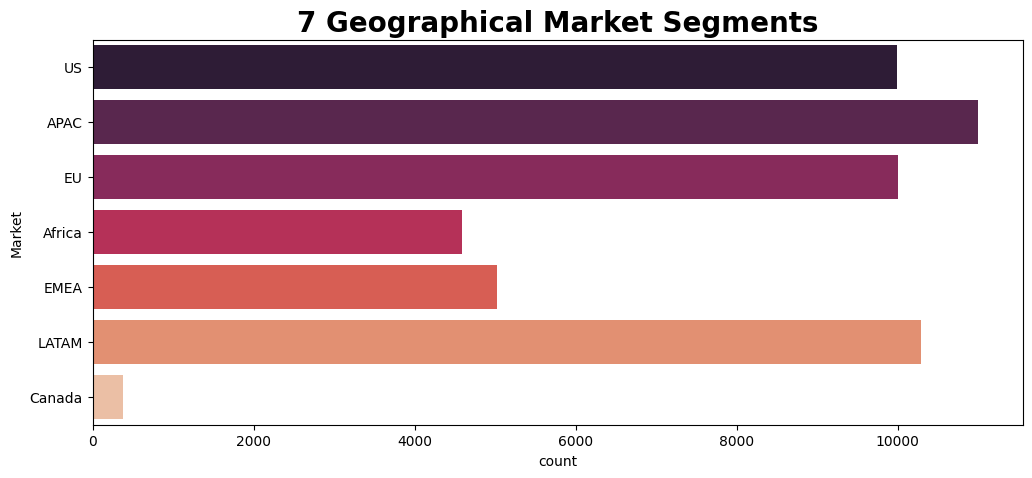

In [ ]:
plt.figure(figsize=(12,5))
print(retail.Market.value_counts())
sns.countplot(retail['Market'], palette='rocket')
plt.title('7 Geographical Market Segments', fontweight='bold', size=20)
plt.show()

Segment
Consumer       26518
Corporate      15429
Home Office     9343
Name: count, dtype: int64


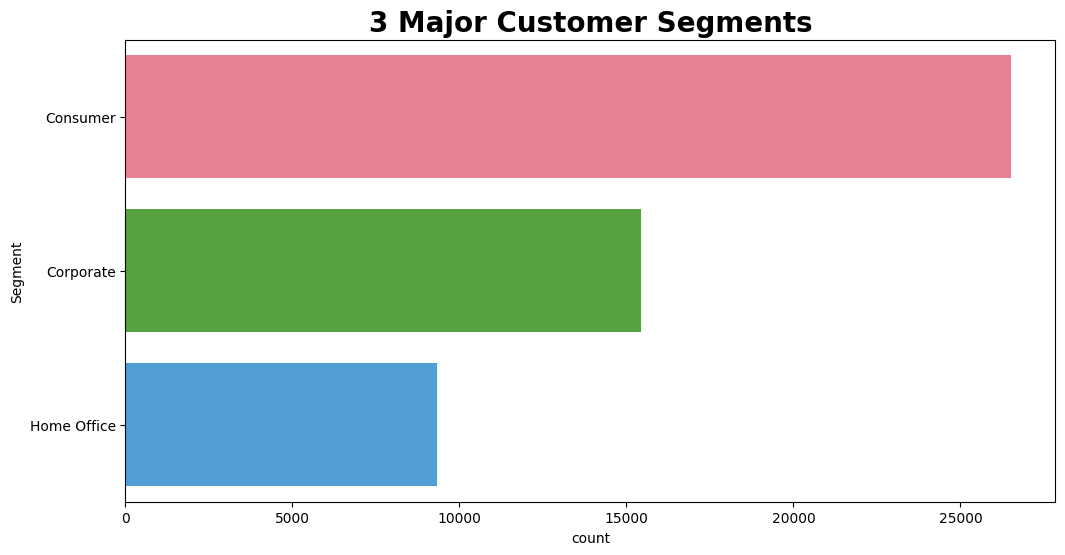

In [ ]:
plt.figure(figsize=(12,6))
print(retail.Segment.value_counts())
sns.countplot(retail['Segment'], palette='husl')
plt.title('3 Major Customer Segments',fontweight='bold', size=20)
plt.show()

Market_Segment
APAC_Consumer         5699
LATAM_Consumer        5321
US_Consumer           5191
EU_Consumer           5186
APAC_Corporate        3283
EU_Corporate          3077
LATAM_Corporate       3053
US_Corporate          3020
EMEA_Consumer         2538
Africa_Consumer       2381
APAC_Home Office      2020
LATAM_Home Office     1920
US_Home Office        1783
EU_Home Office        1737
EMEA_Corporate        1574
Africa_Corporate      1312
EMEA_Home Office       917
Africa_Home Office     894
Canada_Consumer        202
Canada_Corporate       110
Canada_Home Office      72
Name: count, dtype: int64


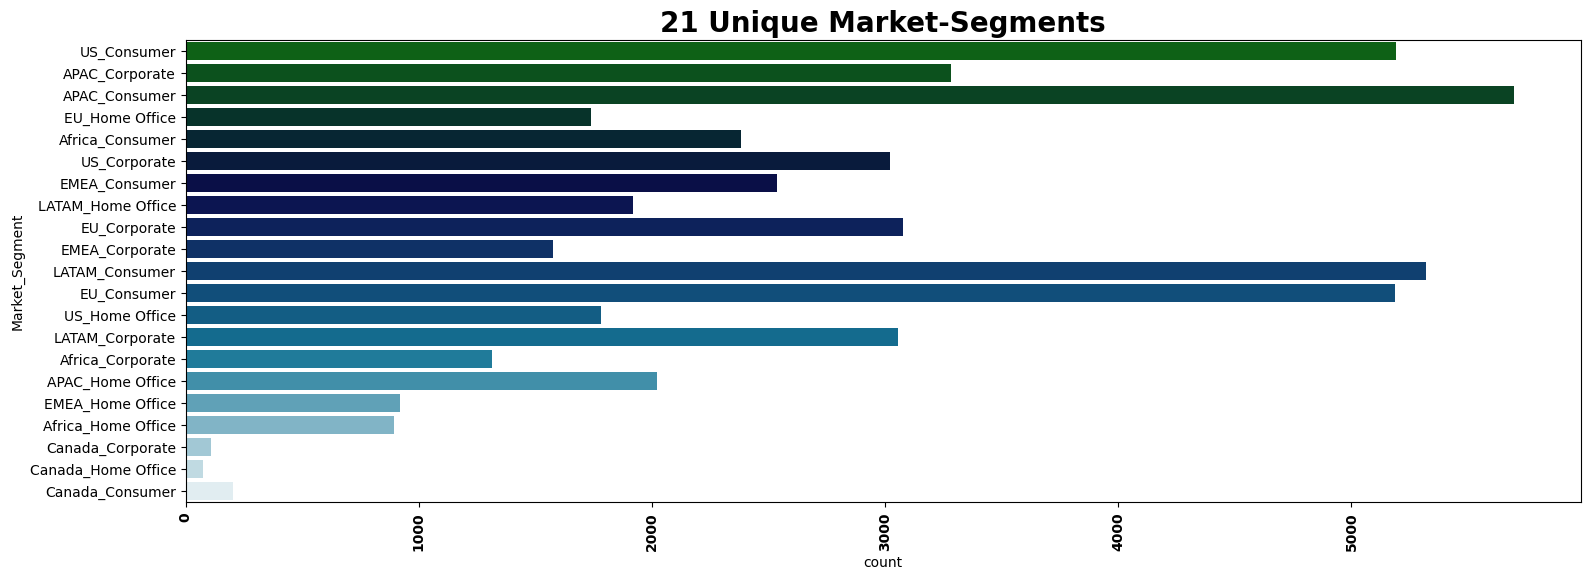

In [ ]:
plt.figure(figsize=(18,6))
print(retail.Market_Segment.value_counts())
sns.countplot(retail['Market_Segment'], palette='ocean')
plt.title('21 Unique Market-Segments',fontweight='bold', size=20)
plt.xticks(rotation = 90,fontweight="bold")
plt.show()

####  We can see from the plot APAC_Consumer has the highest count

### Market- Segment vs Profit

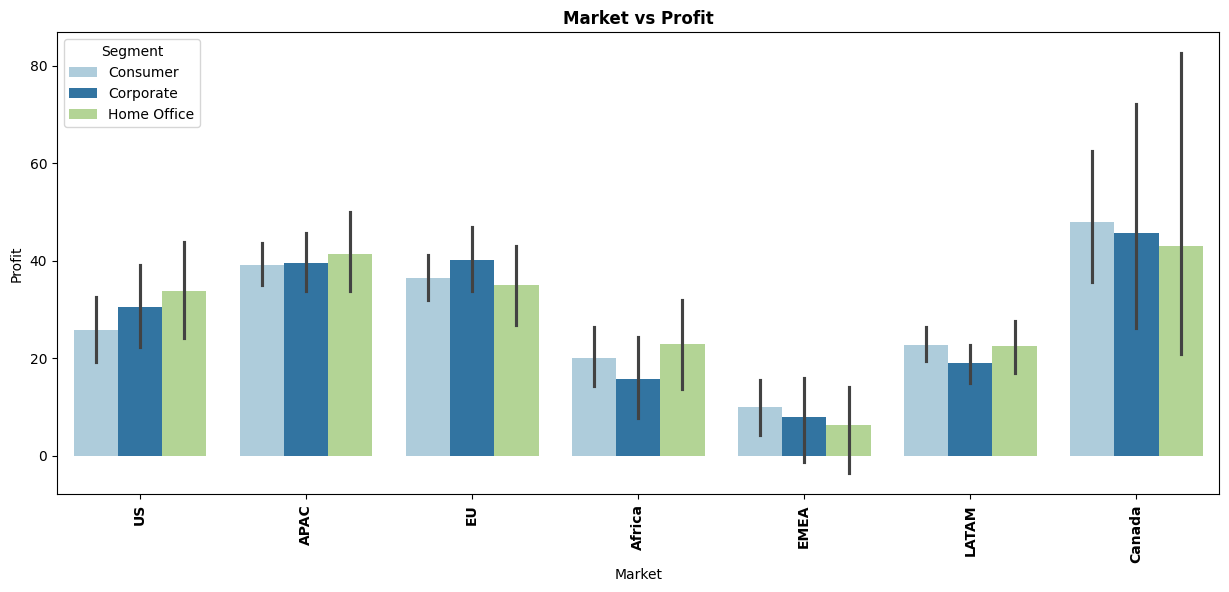

In [ ]:
plt.figure(figsize=(15,6))
sns.barplot(x='Market', y= 'Profit', hue='Segment', data=retail, palette='Paired')
plt.title('Market vs Profit', fontweight='bold')
plt.xticks(rotation = 90,fontweight="bold")
plt.show()

- ####  We can see that Canada and APAC markets with the segments Consumer, Corporate and Home office have more profit
- ####  Africa and EMEA markets have less profit

### Market- Segment vs Sales

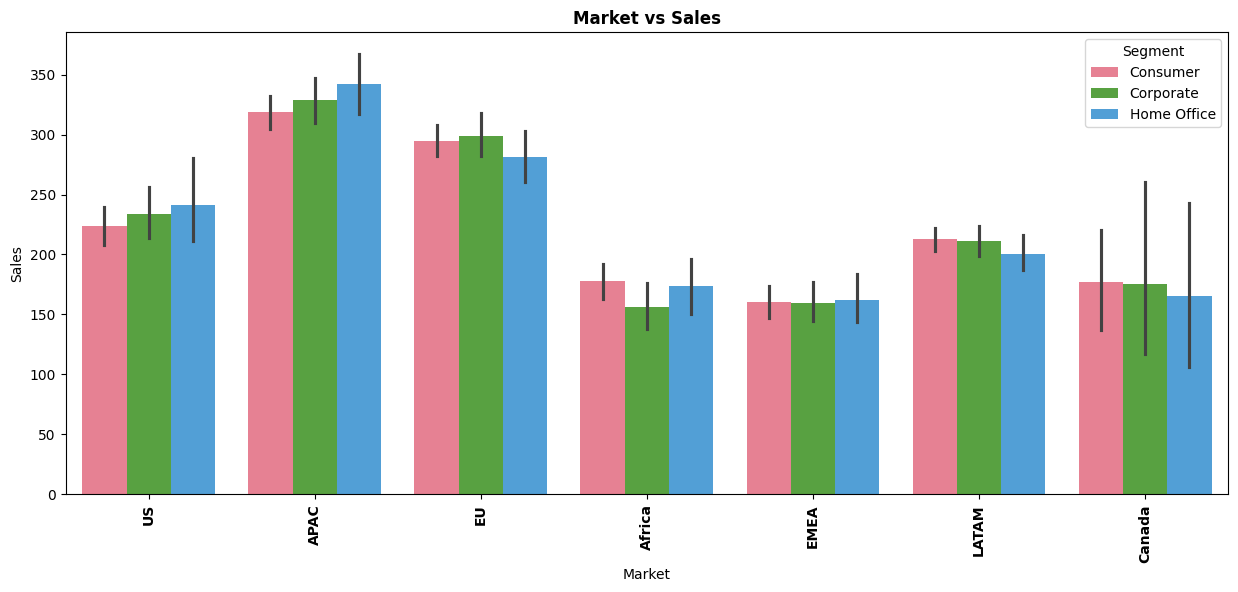

In [ ]:
plt.figure(figsize=(15,6))
sns.barplot(x='Market', y= 'Sales', hue='Segment', data=retail, palette='husl')
plt.title('Market vs Sales', fontweight='bold')
plt.xticks(rotation = 90,fontweight="bold")
plt.show()

- ####  APAC marketis having higher Sales in all the three segments
- ####  EMEA and Africa have less sales    

- ### 3.3.  Lets drop columns 'Market' and 'Segment'

In [ ]:
retail=retail.drop(['Market','Segment'],axis=1)
retail.head()

,Order Date,Sales,Profit,Market_Segment
0,31-07-2012,2309.650,762.1845,US_Consumer
1,05-02-2013,3709.395,-288.7650,APAC_Corporate
2,17-10-2013,5175.171,919.9710,APAC_Consumer
3,28-01-2013,2892.510,-96.5400,EU_Home Office
4,05-11-2013,2832.960,311.5200,Africa_Consumer


- ### 3.4. Convert the order-date into a date-time format

In [ ]:
#convert the order-date into a date-time format for getting it into the Month-year format
retail['Order Date'] = pd.to_datetime(retail['Order Date']).dt.to_period('m')
retail= retail.sort_values(by=['Order Date'])
retail.head()

,Order Date,Sales,Profit,Market_Segment
35058,2011-01,47.43,17.07,EMEA_Corporate
35056,2011-01,41.76,9.18,Africa_Consumer
13226,2011-01,333.00,-16.65,US_Consumer
30830,2011-01,53.91,12.39,EU_Home Office
30782,2011-01,62.34,8.70,EMEA_Consumer


In [ ]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51290 entries, 35058 to 19
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype    
---  ------          --------------  -----    
 0   Order Date      51290 non-null  period[M]
 1   Sales           51290 non-null  float64  
 2   Profit          51290 non-null  float64  
 3   Market_Segment  51290 non-null  object   
dtypes: float64(2), object(1), period[M](1)
memory usage: 2.0+ MB


- ###  3.5. Monthly aggregated transaction data

In [ ]:
retail_profit= retail.pivot_table( index='Order Date',values='Profit', columns='Market_Segment' ,aggfunc='sum')
retail_profit.head()

Market_Segment,APAC_Consumer,APAC_Corporate,APAC_Home Office,Africa_Consumer,Africa_Corporate,Africa_Home Office,Canada_Consumer,Canada_Corporate,Canada_Home Office,EMEA_Consumer,...,EMEA_Home Office,EU_Consumer,EU_Corporate,EU_Home Office,LATAM_Consumer,LATAM_Corporate,LATAM_Home Office,US_Consumer,US_Corporate,US_Home Office
Order Date,,,,,,,,,,,,,,,,,,,,,
2011-01,991.2825,11.5998,86.4423,475.683,219.096,856.710,3.12,5.7,NaN,-2099.364,...,116.400,-845.8290,501.9315,975.360,1976.98976,1150.88400,-106.48800,762.8067,300.9145,1383.0499
2011-02,1338.8688,4358.8254,-417.4128,1441.926,-490.551,820.302,23.31,NaN,87.99,267.060,...,216.690,-1808.1180,2988.4065,-181.041,902.37752,721.25420,300.19936,500.2865,307.2995,58.1420
2011-03,3747.1632,1213.3386,923.7492,322.140,-586.716,67.320,335.55,NaN,84.03,1598.718,...,78.972,2480.5410,736.9890,503.223,2585.17924,39.07512,285.46400,597.2773,333.0515,-431.5989
2011-04,3846.4746,71.0265,657.1080,292.122,776.691,500.136,55.08,NaN,NaN,-300.879,...,-420.090,2496.6405,1056.1785,63.858,387.72148,259.25600,-421.73440,1155.0757,1393.3828,940.3767
2011-05,3639.9423,2534.1672,-272.1717,110.004,241.338,34.926,77.97,NaN,NaN,568.302,...,262.968,254.0805,1586.2740,201.102,1002.34724,-531.74444,-240.11600,698.9171,2063.5013,-23.7088


In [ ]:
retail_profit.shape

(48, 21)

#### We got the data for 48 months now for the 21 Market_Segments


##  3.6 Test-Train Split

In [ ]:
# perform the train-test split such that you take the 42 months as the train data and the 6 months as the test data.
train_len = 42
train = retail_profit[0:train_len] # first 42 months as training set
test = retail_profit[train_len:] # last 6 months as test set

In [ ]:
train.shape

(42, 21)

In [ ]:
train.head()

Market_Segment,APAC_Consumer,APAC_Corporate,APAC_Home Office,Africa_Consumer,Africa_Corporate,Africa_Home Office,Canada_Consumer,Canada_Corporate,Canada_Home Office,EMEA_Consumer,...,EMEA_Home Office,EU_Consumer,EU_Corporate,EU_Home Office,LATAM_Consumer,LATAM_Corporate,LATAM_Home Office,US_Consumer,US_Corporate,US_Home Office
Order Date,,,,,,,,,,,,,,,,,,,,,
2011-01,991.2825,11.5998,86.4423,475.683,219.096,856.710,3.12,5.7,NaN,-2099.364,...,116.400,-845.8290,501.9315,975.360,1976.98976,1150.88400,-106.48800,762.8067,300.9145,1383.0499
2011-02,1338.8688,4358.8254,-417.4128,1441.926,-490.551,820.302,23.31,NaN,87.99,267.060,...,216.690,-1808.1180,2988.4065,-181.041,902.37752,721.25420,300.19936,500.2865,307.2995,58.1420
2011-03,3747.1632,1213.3386,923.7492,322.140,-586.716,67.320,335.55,NaN,84.03,1598.718,...,78.972,2480.5410,736.9890,503.223,2585.17924,39.07512,285.46400,597.2773,333.0515,-431.5989
2011-04,3846.4746,71.0265,657.1080,292.122,776.691,500.136,55.08,NaN,NaN,-300.879,...,-420.090,2496.6405,1056.1785,63.858,387.72148,259.25600,-421.73440,1155.0757,1393.3828,940.3767
2011-05,3639.9423,2534.1672,-272.1717,110.004,241.338,34.926,77.97,NaN,NaN,568.302,...,262.968,254.0805,1586.2740,201.102,1002.34724,-531.74444,-240.11600,698.9171,2063.5013,-23.7088


##  3.7. Calculate the CoV on the profit for each of the 21 market segments on the train data.

- We compare the variance between the segments using the coefficient of variation which will normalise the standard deviation with the mean and give a comparative figure on the basis of which we can identify the most profitable market segment.
- We want to forecast the sales where the market segment is reliable or in other words, there is less variation in the profits.

In [ ]:
mean=train.mean()
std= train.std()

CoV_df= pd.DataFrame(mean)
CoV_df['std']= std
CoV_df['CoV'] = std/mean
CoV_df= CoV_df.reset_index()
CoV_df.columns= ['Market_Segment', 'Mean', 'Std', 'CoV']
CoV_df.sort_values(by='CoV', ascending= True, inplace = True)
CoV_df

,Market_Segment,Mean,Std,CoV
0,APAC_Consumer,4223.553586,2549.477997,0.603633
12,EU_Consumer,3627.517036,2377.233468,0.655334
15,LATAM_Consumer,2252.677529,1551.949398,0.688935
13,EU_Corporate,2251.993036,1571.220713,0.697702
1,APAC_Corporate,2556.998957,1894.221175,0.740799
16,LATAM_Corporate,1075.994223,958.635571,0.890930
19,US_Corporate,1853.568607,1927.082015,1.039660
2,APAC_Home Office,1379.120743,1463.978445,1.061530
18,US_Consumer,2603.736252,2886.427650,1.108571
14,EU_Home Office,1097.441500,1238.125098,1.128192


In [ ]:
Lowest_CoV_value =min(CoV_df["CoV"])
Lowest_CoV_value

0.6036333966862397

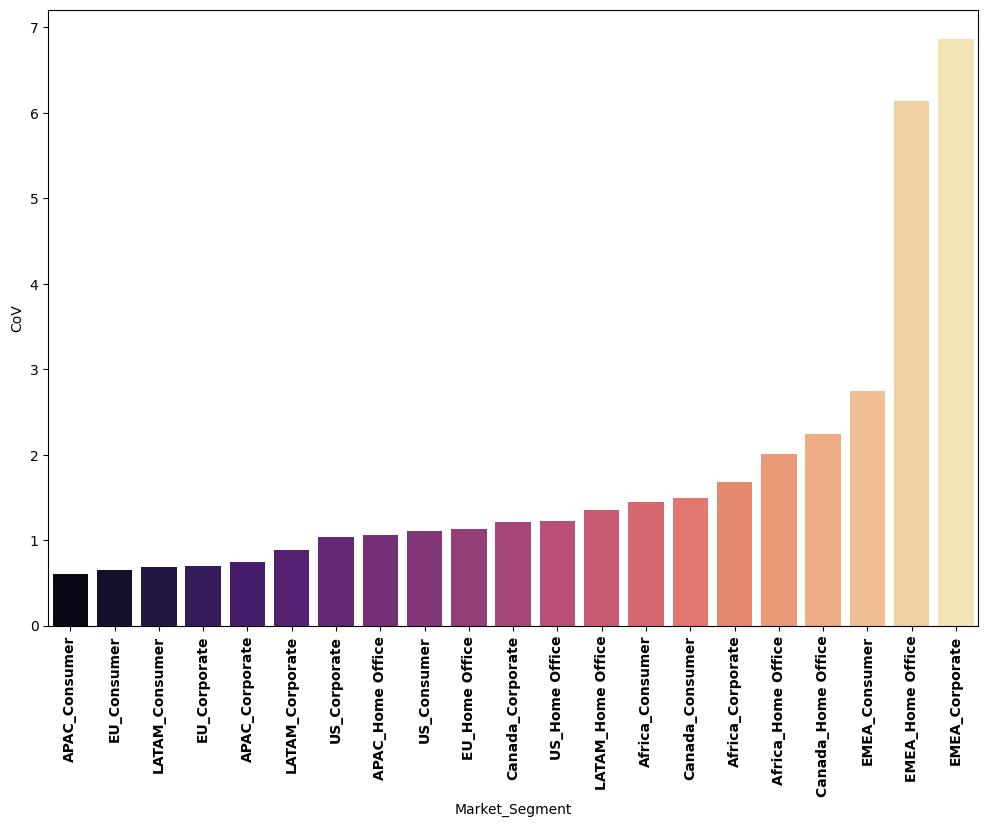

In [ ]:
sns.barplot(x='Market_Segment', y= 'CoV', data=CoV_df, palette='magma')
plt.xticks(rotation = 90,fontweight="bold")
plt.show()

- ### We can see that Lowest CoV is 0.52272
- ### We can infer that the corresponding Marget Segment is "APAC_Consumer"
### The most profitable Market Segment is APAC_Consumer

## 3.8. Convert the Order-Date column from "DateTime" to "timestamp"

In [ ]:
retail['Order Date'].dtype

period[M]

In [ ]:
retail['Order Date'] = retail['Order Date'].astype(str)
retail['Order Date']=pd.to_datetime(retail['Order Date'])

In [ ]:
retail['Order Date'].dtype

dtype('<M8[ns]')

- #### Thus, you will get a timestamp for each order date now as well.

##  3.9.  Filter the Data for Best Market Segment- APAC Consumer

In [ ]:
#Drop the data for the rest 20 market segments and keep only the one for the market segment
#that you found to be the most consistently profitable.
retail_df= retail[(retail.Market_Segment=='APAC_Consumer')]
retail_df.head()

,Order Date,Sales,Profit,Market_Segment
30722,2011-01-01,62.1000,18.5400,APAC_Consumer
22951,2011-01-01,120.3660,36.0360,APAC_Consumer
30532,2011-01-01,34.2900,16.1100,APAC_Consumer
7270,2011-01-01,445.4100,-136.7100,APAC_Consumer
13173,2011-01-01,333.6903,13.4703,APAC_Consumer


In [ ]:
retail_df.shape

(5699, 4)

##  3.9. Grouping data based on Order date and finding sales

In [ ]:
data=pd.DataFrame(retail_df.groupby("Order Date")['Sales'].sum())
data.head()
#df=retail.groupby('Order Date')
#df=pd.DataFrame(df['Sales'].sum())
#df

,Sales
Order Date,
2011-01-01,15711.7125
2011-02-01,12910.8588
2011-03-01,19472.5632
2011-04-01,15440.3046
2011-05-01,24348.9723


In [ ]:
data.shape

(48, 1)

#  4. Time series analysis

- ### 4.1. Plot time series data

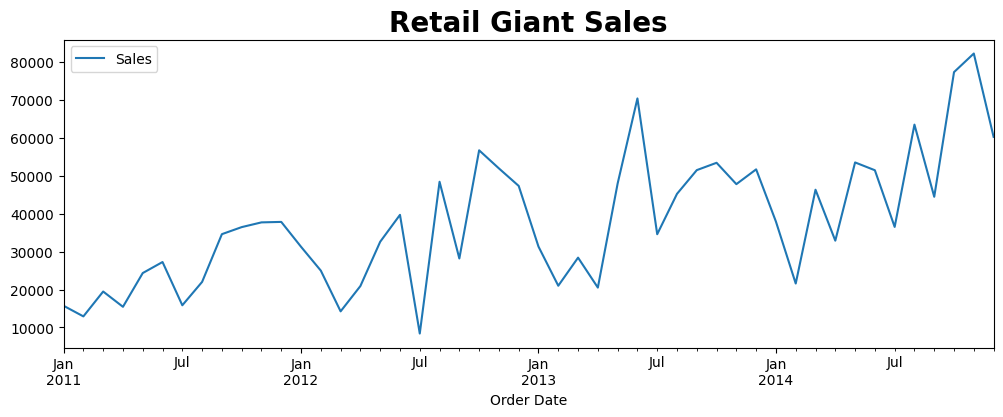

In [ ]:
data.plot(figsize=(12, 4))
plt.legend(loc='best')
plt.title('Retail Giant Sales', fontweight='bold', size=20)
plt.show(block=False)

In [ ]:
data.isnull().sum()

,0
Sales,0


####  There are no misssing values

- ### 4.2. Split time series data into training and test set

In [ ]:
#Perform the train-test split for that market segment that takes the 42 months data as the train data and
#the 6 months data as the test data.
train_len = 42
train = data[0:train_len] # first 120 months as training set
test = data[train_len:] # last 24 months as out-of-time test set

- ### 4.3. Time series Decomposition

Lets understand how a time series can be split into its various components that is the Trend, Seasonality, and residuals


- ### Additive seasonal decomposition

The individual components can be added to get the time-series data

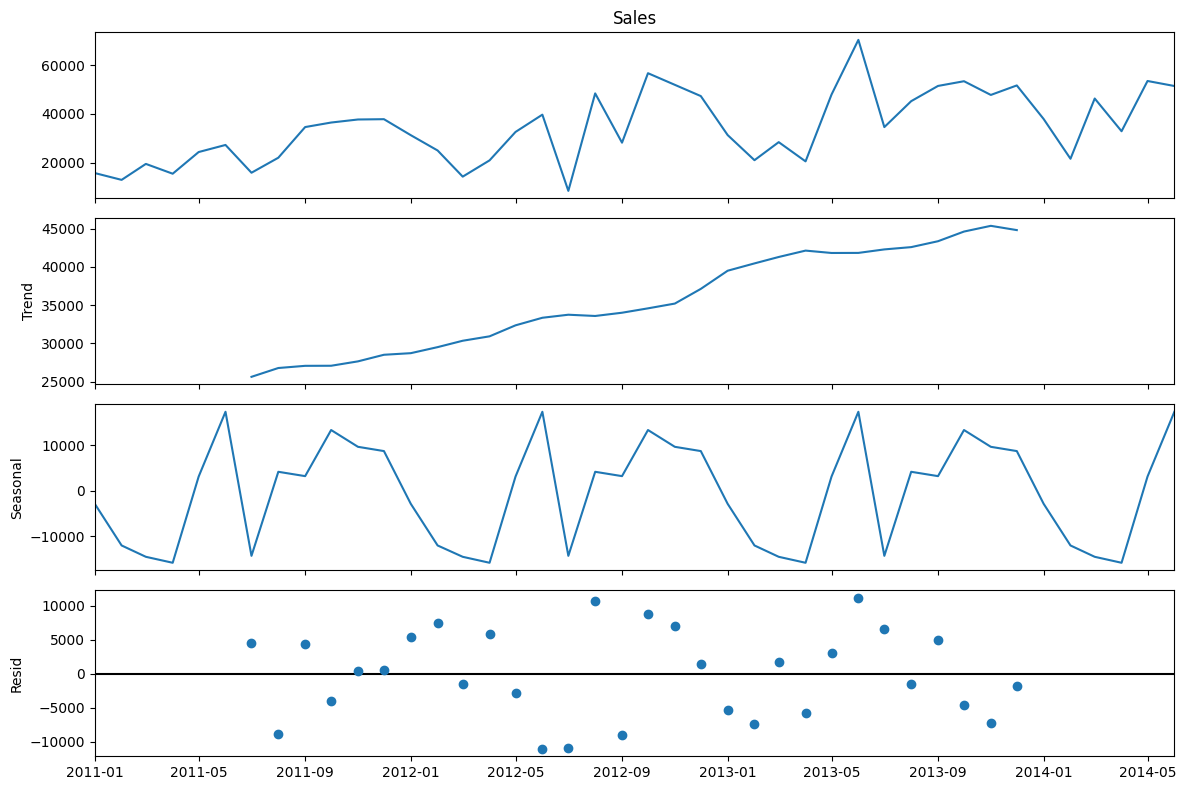

In [ ]:
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 12, 8
decomposition = sm.tsa.seasonal_decompose(train.Sales, model='additive') # additive seasonal index

fig = decomposition.plot()
plt.show()

- ### Multiplicative seasonal decomposition

The individual components can be multiplied to get the time-series data

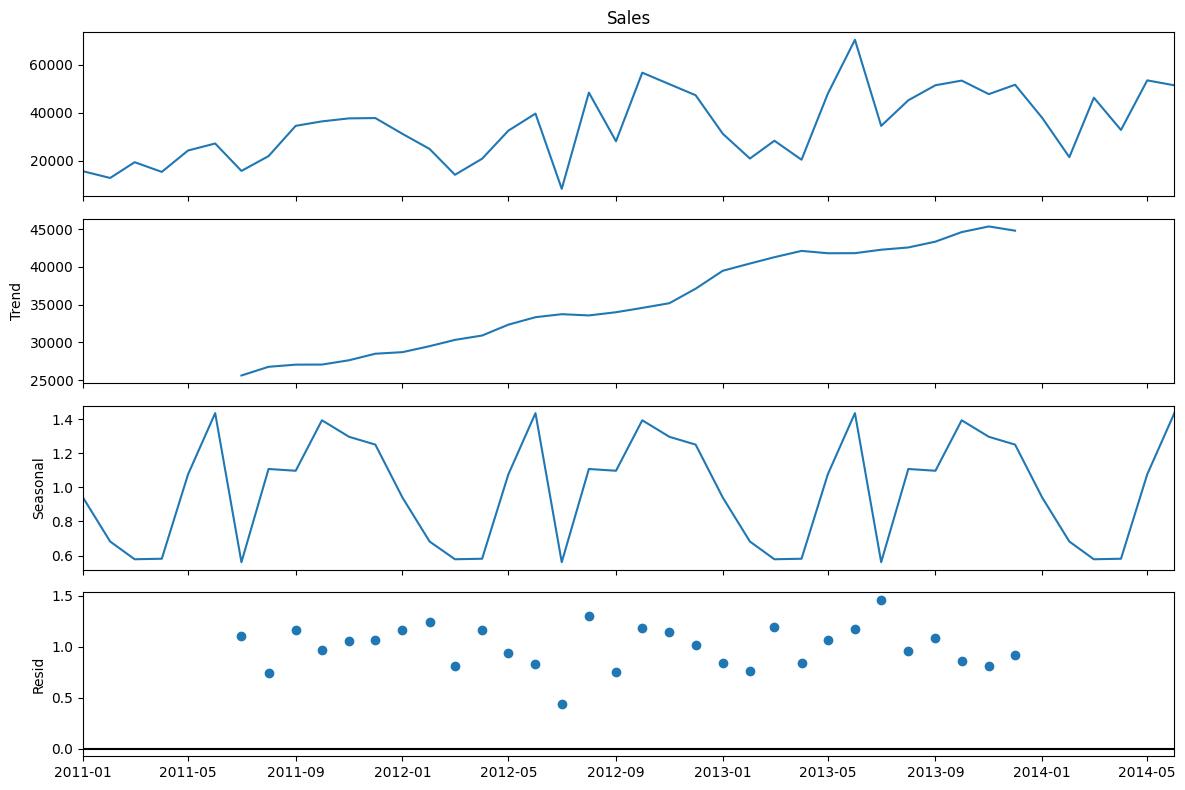

In [ ]:
decomposition = sm.tsa.seasonal_decompose(train.Sales, model='multiplicative') # multiplicative seasonal index
fig = decomposition.plot()
plt.show()

# 5. Build and evaluate time series forecast

Split time series data into training and test set

In [ ]:
#Perform the train-test split for that market segment that takes the 42 months data as the train data and
#the 6 months data as the test data.
train_len = 42
train = data[0:train_len] # first 120 months as training set
test = data[train_len:] # last 24 months as out-of-time test set

- ## 5.1. Simple time series methods

- ### Naive Method
    
    **Forecast = Last month’s sales**

In [ ]:
y_hat_naive = test.copy()
y_hat_naive['naive_forecast'] = train['Sales'][train_len-1] #Last observation in the train data

- ### Plot train, test and forecast

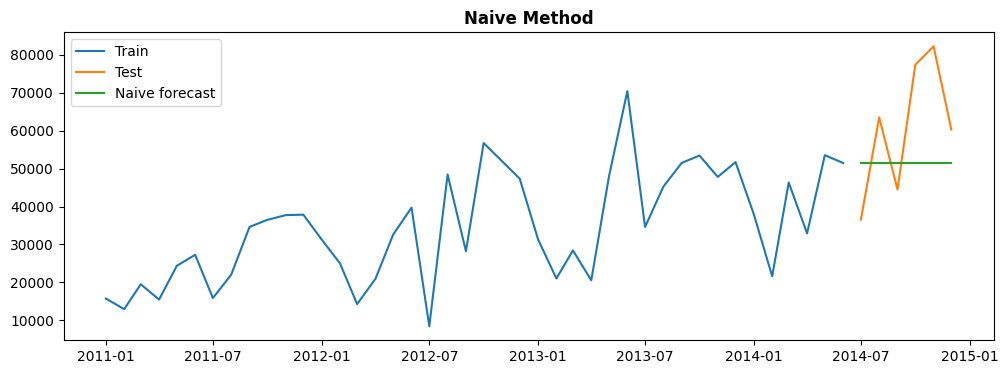

In [ ]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_naive['naive_forecast'], label='Naive forecast')
plt.legend(loc='best')
plt.title('Naive Method', fontweight= 'bold')
plt.show()

- #### As we can see in the plot,in order to forecast the sales from month 2014-07 to  2015-01 we we the last or previous month data which is 2014-06
- #### We can see that the forecast for the next six months is the same value(green line) as the last observation of the blue line    

### Calculate RMSE and MAPE

In [ ]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_naive['naive_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_naive['naive_forecast'])/test['Sales'])*100,2)

results = pd.DataFrame({'Method':['Naive method'], 'MAPE': [mape], 'RMSE': [rmse]})
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,18774.05,26.86


- ### Simple average method

**Forecast = Average of all past months’ sales**

In [ ]:
y_hat_avg = test.copy()
y_hat_avg['avg_forecast'] = train['Sales'].mean()# Average of past months sales

### Plot train, test and forecast

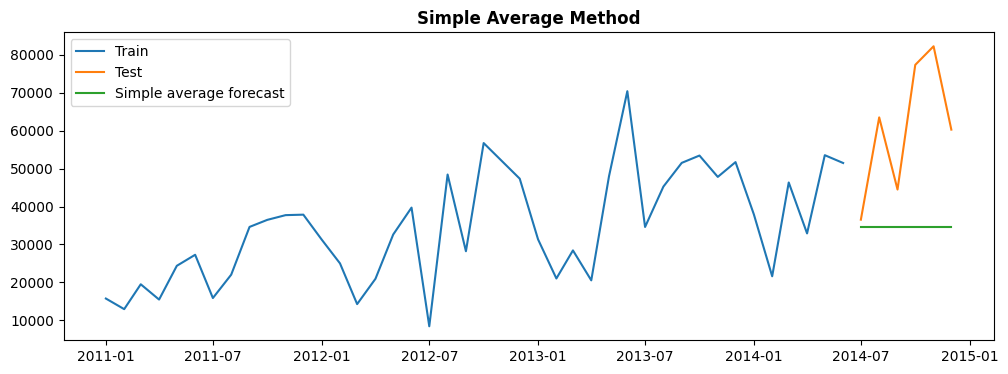

In [ ]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_avg['avg_forecast'], label='Simple average forecast')
plt.legend(loc='best')
plt.title('Simple Average Method', fontweight='bold')
plt.show()

- #### Forecast of months from 2014-07 to 2015-01 = Average of all past months’ sales
- #### Green line is the average of all the 42 months sales data
- #### The green line we forecasted is not showing any trend or seasonality while our train and test data had both trend and seasonality     

### Calculate RMSE and MAPE

In [ ]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_avg['avg_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_avg['avg_forecast'])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple average method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,18774.05,26.86
0,Simple average method,30846.00,38.18


- ### Simple moving average method

**Forecast= Average of only the last few observations to forecast the future**
 - Reduces unsystematic noise in the data

In [ ]:
y_hat_sma = data.copy()
ma_window = 3  # Considered 3 month window
y_hat_sma['sma_forecast'] = data['Sales'].rolling(ma_window).mean()
y_hat_sma['sma_forecast'][train_len:] = y_hat_sma['sma_forecast'][train_len-1]

### Plot train, test and forecast

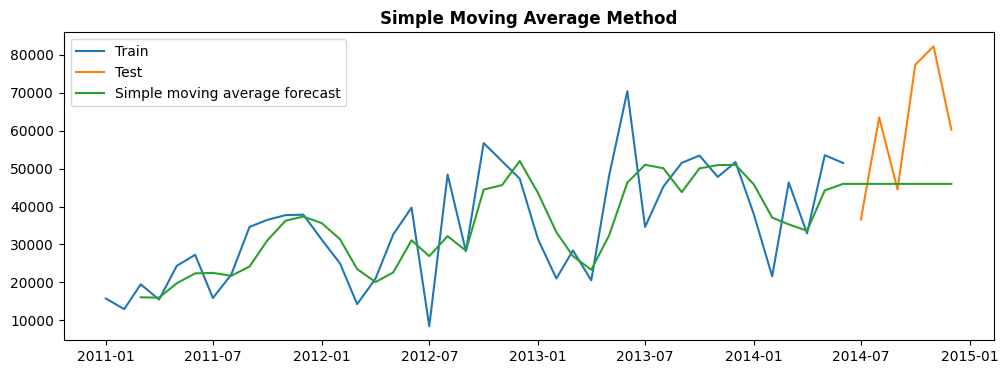

In [ ]:
 plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_sma['sma_forecast'], label='Simple moving average forecast')
plt.legend(loc='best')
plt.title('Simple Moving Average Method', fontweight= 'bold')
plt.show()

### Calculate RMSE and MAPE

In [ ]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_sma['sma_forecast'][train_len:])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_sma['sma_forecast'][train_len:])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple moving average forecast'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,18774.05,26.86
0,Simple average method,30846.00,38.18
0,Simple moving average forecast,22019.48,27.55


## Exponential smoothing methods

### Simple exponential smoothing

- **The most recent period's demand multiplied by the smoothing factor.**
- It is a time series forecasting method for univariate data without a trend or seasonality.
- The simple exponetial model captures the level of a time series.

In [ ]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
model = SimpleExpSmoothing(train['Sales'])
model_fit = model.fit(optimized=True)
model_fit.params
y_hat_ses = test.copy()
y_hat_ses['ses_forecast'] = model_fit.forecast(6)

### Plot train, test and forecast

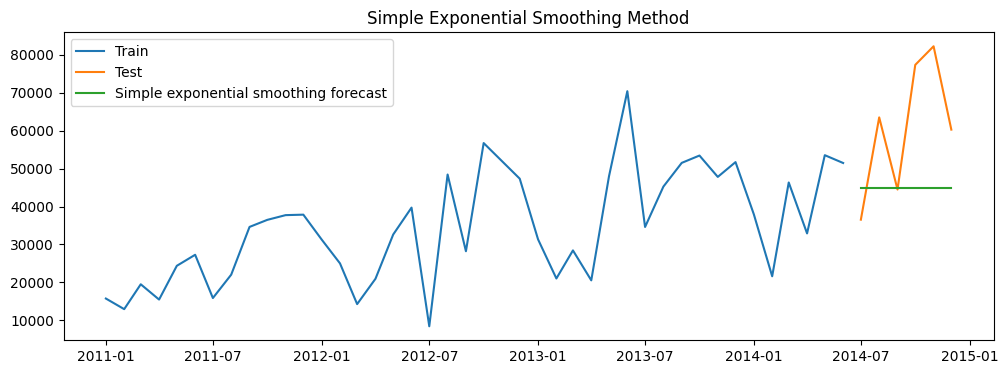

In [ ]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_ses['ses_forecast'], label='Simple exponential smoothing forecast')
plt.legend(loc='best')
plt.title('Simple Exponential Smoothing Method')
plt.show()

#### We can see that The simple exponential model captured the level of a time series.

### Calculate RMSE and MAPE

In [ ]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_ses['ses_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_ses['ses_forecast'])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple exponential smoothing forecast'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results

,Method,RMSE,MAPE
0,Naive method,18774.05,26.86
0,Simple average method,30846.00,38.18
0,Simple moving average forecast,22019.48,27.55
0,Simple exponential smoothing forecast,22824.62,27.70


### Holt's Exponential Smoothing

- Captures both level and trend of a time series in the forecast.

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
model = ExponentialSmoothing(np.asarray(train['Sales']) ,seasonal_periods=12 ,trend='additive', seasonal=None)
model_fit = model.fit(smoothing_level=0.2, smoothing_slope=0.01, optimized=False)
print(model_fit.params)
y_hat_holt = test.copy()
y_hat_holt['holt_forecast'] = model_fit.forecast(len(test))

{'smoothing_level': 0.2, 'smoothing_trend': 0.01, 'smoothing_seasonal': None, 'damping_trend': nan, 'initial_level': np.float64(10555.930159999994), 'initial_trend': np.float64(2155.007810909092), 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


### Plot train, test and forecast

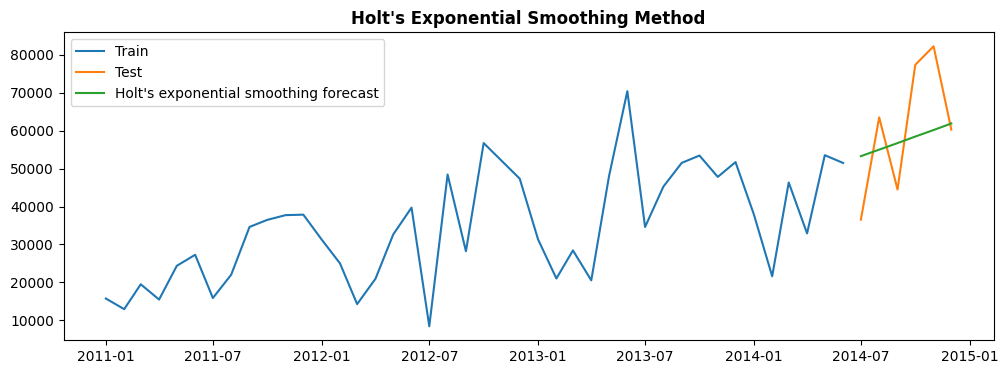

In [ ]:
plt.figure(figsize=(12,4))
plt.plot( train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_holt['holt_forecast'], label='Holt\'s exponential smoothing forecast')
plt.legend(loc='best')
plt.title('Holt\'s Exponential Smoothing Method', fontweight='bold')
plt.show()

#### <font color=green>We can see that the forecast is a straight line, sloping upwards as Holt's method captured both level and trend

### Calculate RMSE and MAPE

In [ ]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_holt['holt_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_holt['holt_forecast'])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt\'s exponential smoothing method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,18774.05,26.86
0,Simple average method,30846.00,38.18
0,Simple moving average forecast,22019.48,27.55
0,Simple exponential smoothing forecast,22824.62,27.70
0,Holt's exponential smoothing method,15014.67,23.47


### Holt Winters' additive method with trend and seasonality

**Forecasts based on level, trend and seasonality of a time series**

In [ ]:
y_hat_hwa = test.copy()
model = ExponentialSmoothing(np.asarray(train['Sales']) ,seasonal_periods=12 ,trend='add', seasonal='add')
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_hwa['hw_forecast'] = model_fit.forecast(6)

{'smoothing_level': np.float64(0.005), 'smoothing_trend': np.float64(0.005), 'smoothing_seasonal': np.float64(0.0001), 'damping_trend': nan, 'initial_level': np.float64(25191.878854999984), 'initial_trend': np.float64(549.1511154545474), 'initial_seasons': array([ -3046.57535417, -12233.28766042, -14734.34056667, -16050.40451667,
         2962.22100208,  17242.34903958, -17814.35478542,   4804.01762083,
          623.89353958,  15536.36958958,  13175.71666458,   9534.39542708]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


- ### Plot train, test and forecast

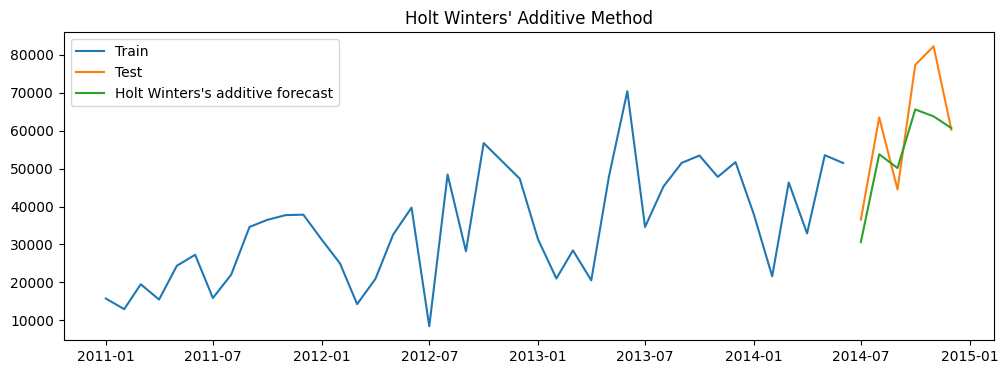

In [ ]:
plt.figure(figsize=(12,4))
plt.plot( train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_hwa['hw_forecast'], label='Holt Winters\'s additive forecast')
plt.legend(loc='best')
plt.title('Holt Winters\' Additive Method')
plt.show()

####  We can see that we are able to capture good amount of seasonal variation and even the trend

- ### Calculate RMSE and MAPE

In [ ]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_hwa['hw_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_hwa['hw_forecast'])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt Winters\' additive method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,18774.05,26.86
0,Simple average method,30846.00,38.18
0,Simple moving average forecast,22019.48,27.55
0,Simple exponential smoothing forecast,22824.62,27.70
0,Holt's exponential smoothing method,15014.67,23.47
0,Holt Winters' additive method,10350.33,13.77


#### We can see Holt Winter's Additive methid has the lowest  RMSE and MAPE values. Which means error measures are very less in this model

### Holt Winter's multiplicative method with trend and seasonality

**Forecast= Multiplies the trended forecast by the seasonality**

In [ ]:
y_hat_hwm = test.copy()
model = ExponentialSmoothing(np.asarray(train['Sales']) ,seasonal_periods=12 ,trend='add', seasonal='mul')
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_hwm['hw_forecast'] = model_fit.forecast(6)

{'smoothing_level': np.float64(0.005), 'smoothing_trend': np.float64(0.005), 'smoothing_seasonal': np.float64(0.07107142857142858), 'damping_trend': nan, 'initial_level': np.float64(25191.878854999984), 'initial_trend': np.float64(549.1511154545474), 'initial_seasons': array([0.93074061, 0.67529696, 0.57227633, 0.57532186, 1.06552983,
       1.42137084, 0.42860295, 1.11971051, 1.04228985, 1.47741289,
       1.40453147, 1.28691591]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


### Plot train, test and forecast

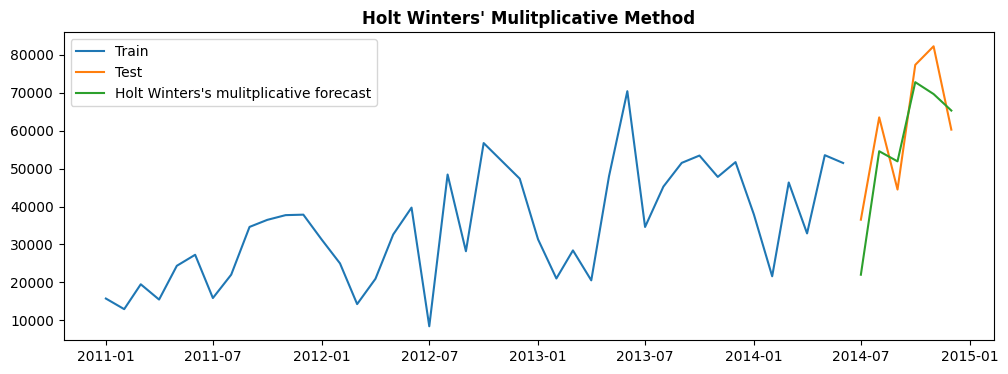

In [ ]:
plt.figure(figsize=(12,4))
plt.plot( train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_hwm['hw_forecast'], label='Holt Winters\'s mulitplicative forecast')
plt.legend(loc='best')
plt.title('Holt Winters\' Mulitplicative Method', fontweight='bold')
plt.show()

### Calculate RMSE and MAPE

In [ ]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_hwm['hw_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_hwm['hw_forecast'])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt Winters\' multiplicative method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,18774.05,26.86
0,Simple average method,30846.00,38.18
0,Simple moving average forecast,22019.48,27.55
0,Simple exponential smoothing forecast,22824.62,27.70
0,Holt's exponential smoothing method,15014.67,23.47
0,Holt Winters' additive method,10350.33,13.77
0,Holt Winters' multiplicative method,9585.23,16.69


- ### From the Smoothing Techniques performed we can conclude that Holt Winter's Additive Method is giving the better forecast to of the sales for the 6 months, since the predicted sales are closer to the actual sales.
- ### We could also see that the RMSE and MAPE values is the least among all the methods done above.

## 5.2. Auto Regressive methods

In an autoregressive model, the regression technique is used to formulate a time series problem. In order to implement autoregressive models, we forecast future observations using a linear combination of past observations of the same variable

### Stationarity vs non-stationary time series

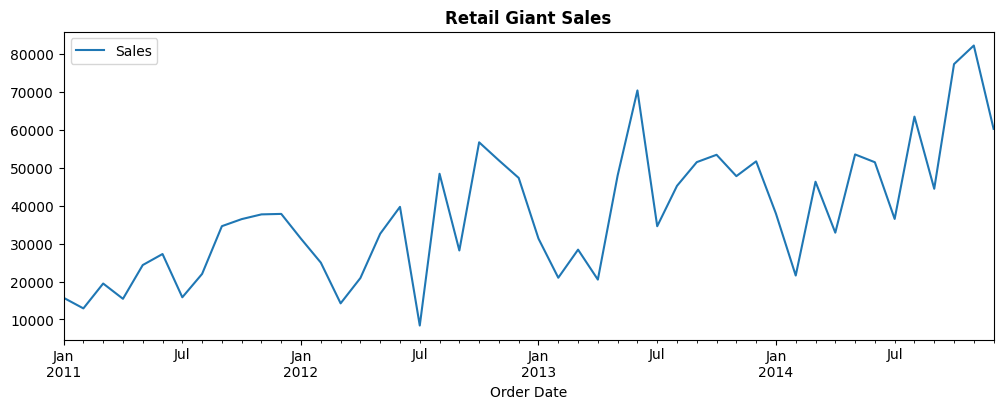

In [ ]:
data['Sales'].plot(figsize=(12, 4))
plt.legend(loc='best')
plt.title('Retail Giant Sales', fontweight='bold')
plt.show(block=False)

###  Augmented Dickey-Fuller (ADF) test

Null Hypothesis $(H0)$: The series is not stationary      $p-value > 0.05 $

Alternate Hypothesis:$(H1)$ The series is stationary   $p-value <= 0.05 $

In [ ]:
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(data['Sales'])

print('ADF Statistic: %f' % adf_test[0])
print('Critical Values @ 0.05: %.2f' % adf_test[4]['5%'])
print('p-value: %f' % adf_test[1])

ADF Statistic: -2.220857
Critical Values @ 0.05: -2.93
p-value: 0.198763


- ####  We can see that p-value is 0.011, which is less than 0.05
-  ####  So The series is stationary. And Reject the null hypothesis $(H0)$

### Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test

Null Hypothesis $(H0)$: The series is stationary      $p-value > 0.05 $

Alternate Hypothesis:$(H1)$ The series is not stationary   $p-value <= 0.05 $

In [ ]:
from statsmodels.tsa.stattools import kpss
kpss_test = kpss(data['Sales'])

print('KPSS Statistic: %f' % kpss_test[0])
print('Critical Values @ 0.05: %.2f' % kpss_test[3]['5%'])
print('p-value: %f' % kpss_test[1])

KPSS Statistic: 0.940353
Critical Values @ 0.05: 0.46
p-value: 0.010000


- ####  p-value is 0.024 < 0.05
- ####   Which means the series is not Stationary                                                

**The two tools to convert a non-stationary series into stationary series are as follows:**

- Differencing
- Transformation

### Box Cox transformation to make variance constant

- **Box-Cox Transformation makes the variance constant in a Time series.**

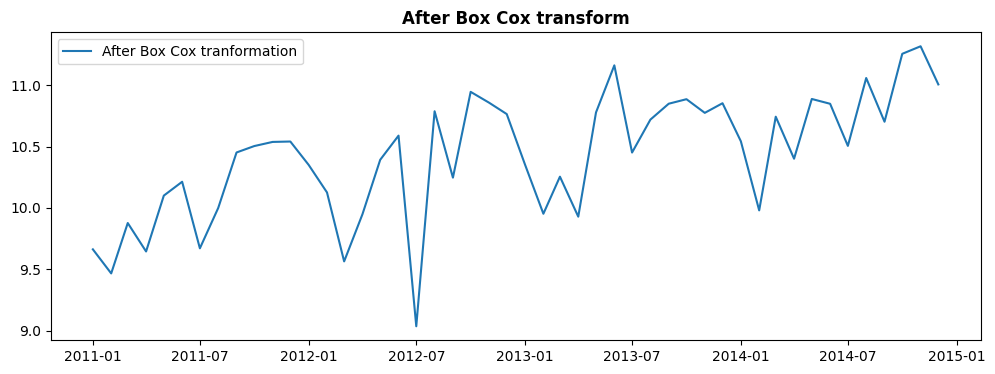

In [ ]:
from scipy.stats import boxcox
data_boxcox = pd.Series(boxcox(data['Sales'], lmbda=0), index = data.index)

plt.figure(figsize=(12,4))
plt.plot(data_boxcox, label='After Box Cox tranformation')
plt.legend(loc='best')
plt.title('After Box Cox transform', fontweight= 'bold')
plt.show()

### Differencing to remove trend

- **Differencing is performed by subtracting the previous observation from the current observation.**
- **Differencing can remove both Trend and seasonality in a Time series.**

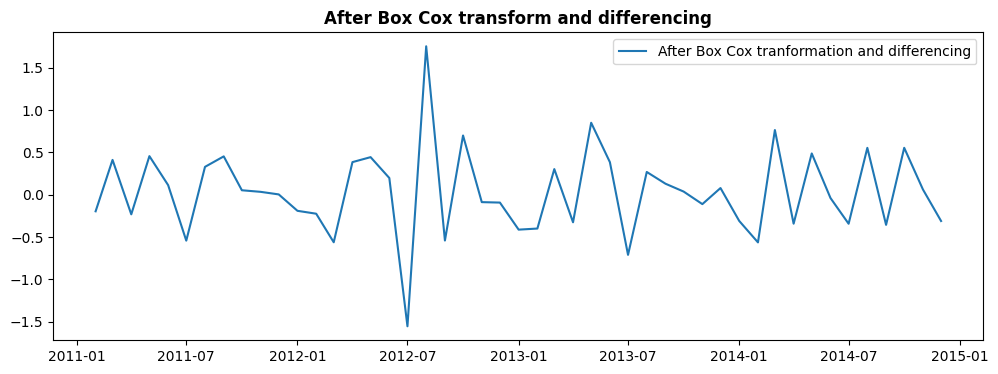

In [ ]:
data_boxcox_diff = pd.Series(data_boxcox - data_boxcox.shift(), data.index)
plt.figure(figsize=(12,4))
plt.plot(data_boxcox_diff, label='After Box Cox tranformation and differencing')
plt.legend(loc='best')
plt.title('After Box Cox transform and differencing', fontweight='bold')
plt.show()

- #### The series looks Stationary
- #### The fluctuations are under constant limits
- #### The mean is also centered around zero

In [ ]:
data_boxcox_diff.dropna(inplace=True)

In [ ]:
data_boxcox_diff.tail()

,0
Order Date,
2014-08-01,0.553405
2014-09-01,-0.356405
2014-10-01,0.553748
2014-11-01,0.061479
2014-12-01,-0.311004


### Augmented Dickey-Fuller (ADF) test

In [ ]:
adf_test = adfuller(data_boxcox_diff)

print('ADF Statistic: %f' % adf_test[0])
print('Critical Values @ 0.05: %.2f' % adf_test[4]['5%'])
print('p-value: %f' % adf_test[1])

ADF Statistic: -5.769275
Critical Values @ 0.05: -2.95
p-value: 0.000001


- ####  p-value is 0.0001 < 0.05, Reject the null hypothesis $(H0)$
- ####  The series is stationary                                            

### Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test

In [ ]:
kpss_test = kpss(data_boxcox_diff)

print('KPSS Statistic: %f' % kpss_test[0])
print('Critical Values @ 0.05: %.2f' % kpss_test[3]['5%'])
print('p-value: %f' % kpss_test[1])

KPSS Statistic: 0.094966
Critical Values @ 0.05: 0.46
p-value: 0.100000


- ####  p-value is 0.100 >= 0.05,  Fail to reject the null hypothesis  $(H0)$
- ####  The series is stationary                                            

### Thus after performing the Stationarity Tests we can see that we are able to convert a non-stationary series into a stationary series to build an Auto Regressive model.

### Autocorrelation function (ACF)

- The correlation of the time series observations with values of the same series at previous times(lags) is called autocorrelation.
- ACF describes the autocorrelation between observation and another observation at a prior time step that includes direct and indirect dependence information.

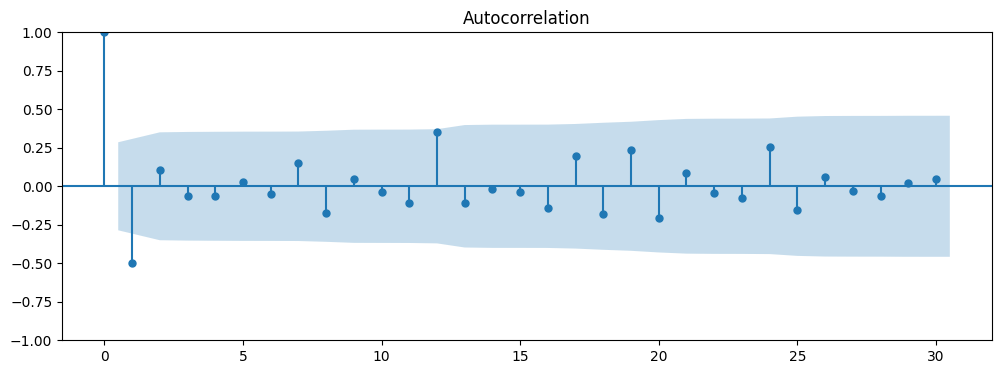

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
plt.figure(figsize=(12,4))
plot_acf(data_boxcox_diff, ax=plt.gca(), lags = 30)
plt.show()

### Partial autocorrelation function (PACF)

- The PACF only describes the direct relationship between an observation and its lag.

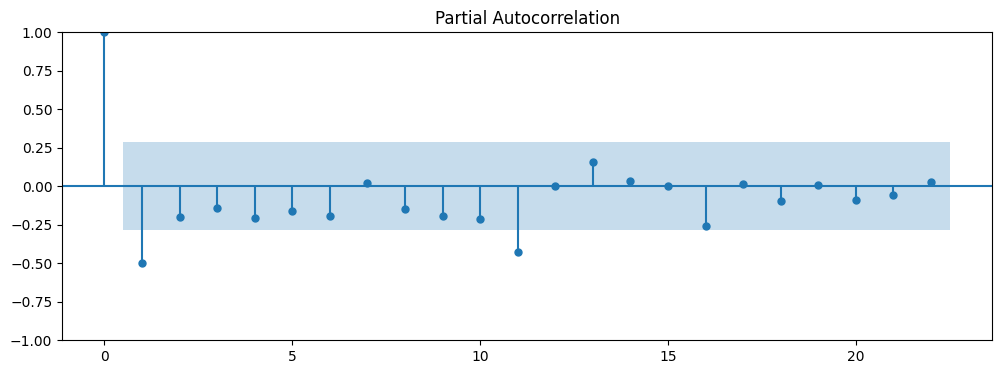

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf
plt.figure(figsize=(12,4))
plot_pacf(data_boxcox_diff, ax=plt.gca(), lags =22 )
plt.show()

In [ ]:
train_data_boxcox = data_boxcox[:train_len]
test_data_boxcox = data_boxcox[train_len:]
train_data_boxcox_diff = data_boxcox_diff[:train_len-1]
test_data_boxcox_diff = data_boxcox_diff[train_len-1:]

train_data_boxcox_diff

###  We will directly use p=1, q=1 and d=1 as the forecasts are relatively better for these values.

## Auto regression method (AR)

- It models the future observation as a linear regression of one or more past observations.
- The parameter of the autoregressive model 'p' is calculated from the Partial Autocorrelation Function plot.
- Select p as the highest lag where partial autocorrelation is significantly high

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train_data_boxcox_diff, order=(1, 0, 0))
model_fit = model.fit()
print(model_fit.params)

const     0.031315
ar.L1    -0.483974
sigma2    0.211971
dtype: float64


### Recover original time series

In [ ]:
y_hat_ar = data_boxcox_diff.copy()
y_hat_ar['ar_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_ar['ar_forecast_boxcox'] = y_hat_ar['ar_forecast_boxcox_diff'].cumsum()
y_hat_ar['ar_forecast_boxcox'] = y_hat_ar['ar_forecast_boxcox'].add(data_boxcox[0])
y_hat_ar['ar_forecast'] = np.exp(y_hat_ar['ar_forecast_boxcox'])

### Plot train, test and forecast

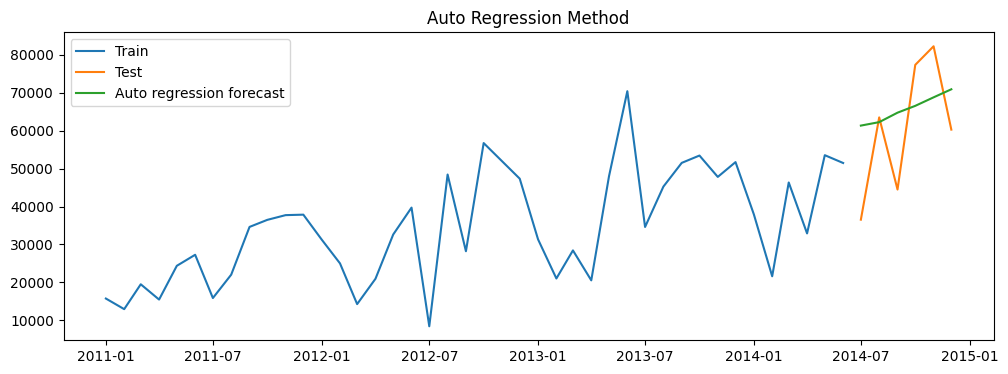

In [ ]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_ar['ar_forecast'][test.index.min():], label='Auto regression forecast')
plt.legend(loc='best')
plt.title('Auto Regression Method')
plt.show()

####  From the plot we can see that we are able to capture trend in the forecast but could not cature the seasonality

### Calculate RMSE and MAPE

In [ ]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_ar['ar_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_ar['ar_forecast'][test.index.min():])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Autoregressive (AR) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,18774.05,26.86
0,Simple average method,30846.00,38.18
0,Simple moving average forecast,22019.48,27.55
0,Simple exponential smoothing forecast,22824.62,27.70
0,Holt's exponential smoothing method,15014.67,23.47
0,Holt Winters' additive method,10350.33,13.77
0,Holt Winters' multiplicative method,9585.23,16.69
0,Autoregressive (AR) method,15498.94,27.26


####  The RMSE and MAPE values are slightly high again.

### Moving average method (MA)

- The Moving Average Model models the future forecasts using past forecast errors in a regression-like model.
- This model has a parameter ‘q’ called window size over which linear combination of errors are calculated.
- q is calculated from the Autocorrelation function plot. Select q as the highest lag beyond which autocorrelation dies down

In [ ]:
model = ARIMA(train_data_boxcox_diff, order=(0, 0, 1))
model_fit = model.fit()
print(model_fit.params)

const     0.022689
ma.L1    -0.999630
sigma2    0.155059
dtype: float64


### Recover original time series

In [ ]:
y_hat_ma = data_boxcox_diff.copy()
y_hat_ma['ma_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_ma['ma_forecast_boxcox'] = y_hat_ma['ma_forecast_boxcox_diff'].cumsum()
y_hat_ma['ma_forecast_boxcox'] = y_hat_ma['ma_forecast_boxcox'].add(data_boxcox[0])
y_hat_ma['ma_forecast'] = np.exp(y_hat_ma['ma_forecast_boxcox'])

### Plot train, test and forecast

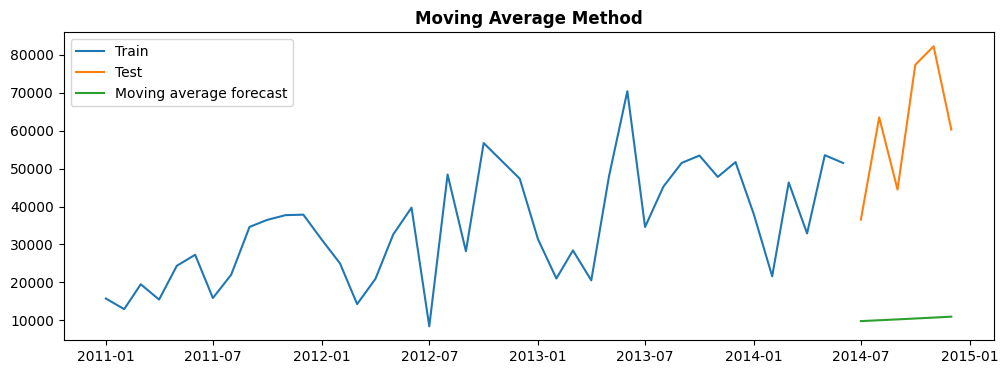

In [ ]:
plt.figure(figsize=(12,4))
plt.plot(data['Sales'][:train_len], label='Train')
plt.plot(data['Sales'][train_len:], label='Test')
plt.plot(y_hat_ma['ma_forecast'][test.index.min():], label='Moving average forecast')
plt.legend(loc='best')
plt.title('Moving Average Method', fontweight='bold')
plt.show()

####  We are able to capture trend but not seasonality in the forecast

### Calculate RMSE and MAPE

In [ ]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_ma['ma_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_ma['ma_forecast'][test.index.min():])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Moving Average (MA) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,18774.05,26.86
0,Simple average method,30846.00,38.18
0,Simple moving average forecast,22019.48,27.55
0,Simple exponential smoothing forecast,22824.62,27.70
0,Holt's exponential smoothing method,15014.67,23.47
0,Holt Winters' additive method,10350.33,13.77
0,Holt Winters' multiplicative method,9585.23,16.69
0,Autoregressive (AR) method,15498.94,27.26
0,Moving Average (MA) method,52917.91,81.67


####  The RMSE and MAPE values are high which means too many errors

### Auto regression moving average method (ARMA)

- A time series that exhibits the characteristics of an $AR(p)$ and/or $MA(q)$ process can be modelled using an $ARMA(p,q)$ model
- It models the future observation as linear regression of one or more past observations and past forecast errors.



In [ ]:
model = ARIMA(train_data_boxcox_diff, order=(1, 0, 1))
model_fit = model.fit()
print(model_fit.params)

const     0.022805
ar.L1     0.115924
ma.L1    -0.999962
sigma2    0.153805
dtype: float64


### Recover original time series

In [ ]:
y_hat_arma = data_boxcox_diff.copy()
y_hat_arma['arma_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_arma['arma_forecast_boxcox'] = y_hat_arma['arma_forecast_boxcox_diff'].cumsum()
y_hat_arma['arma_forecast_boxcox'] = y_hat_arma['arma_forecast_boxcox'].add(data_boxcox[0])
y_hat_arma['arma_forecast'] = np.exp(y_hat_arma['arma_forecast_boxcox'])

### Plot train, test and forecast

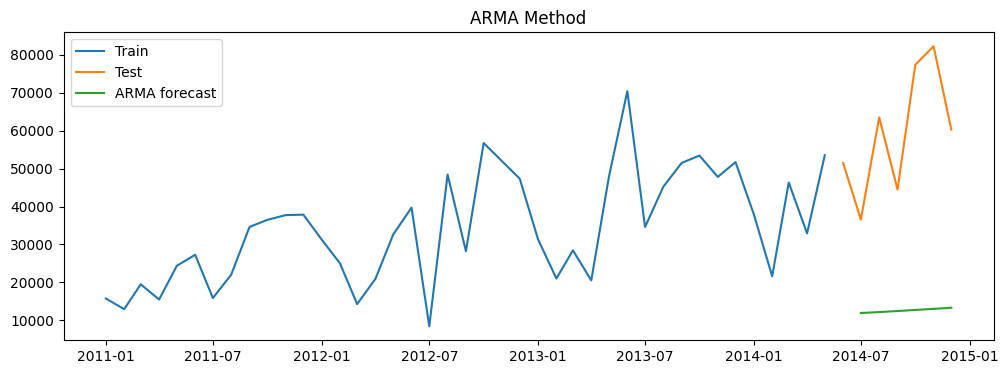

In [ ]:
plt.figure(figsize=(12,4))
plt.plot( data['Sales'][:train_len-1], label='Train')
plt.plot(data['Sales'][train_len-1:], label='Test')
plt.plot(y_hat_arma['arma_forecast'][test.index.min():], label='ARMA forecast')
plt.legend(loc='best')
plt.title('ARMA Method')
plt.show()

#### ARMA model captured Trend but no seasonality

### Calculate RMSE and MAPE

In [ ]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_arma['arma_forecast'][train_len-1:])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_arma['arma_forecast'][train_len-1:])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Autoregressive moving average (ARMA) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,18774.05,26.86
0,Simple average method,30846.00,38.18
0,Simple moving average forecast,22019.48,27.55
0,Simple exponential smoothing forecast,22824.62,27.70
0,Holt's exponential smoothing method,15014.67,23.47
0,Holt Winters' additive method,10350.33,13.77
0,Holt Winters' multiplicative method,9585.23,16.69
0,Autoregressive (AR) method,15498.94,27.26
0,Moving Average (MA) method,52917.91,81.67
0,Autoregressive moving average (ARMA) method,50776.01,77.69


####  We can see high values of MAPE and RMSE
    

### Auto regressive integrated moving average (ARIMA)

- ARIMA model has three parameters
- p: Highest lag included in the regression model
- d: Degree of differencing to make the series stationary
- q: Number of past error terms included in the regression model

- 'd' is the differencing parameter. If d is 1, that means the series now has slope 0 and thus will have no trend. That means, the time series initially had trend.

In [ ]:
model = ARIMA(train_data_boxcox, order=(1, 1, 1))# p,d,q
model_fit = model.fit()
print(model_fit.params)

ar.L1     0.124022
ma.L1    -0.815407
sigma2    0.187389
dtype: float64


### Recover original time series forecast

In [ ]:
y_hat_arima = data_boxcox_diff.copy()
y_hat_arima['arima_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_arima['arima_forecast_boxcox'] = y_hat_arima['arima_forecast_boxcox_diff'].cumsum()
y_hat_arima['arima_forecast_boxcox'] = y_hat_arima['arima_forecast_boxcox'].add(data_boxcox[0])
y_hat_arima['arima_forecast'] = np.exp(y_hat_arima['arima_forecast_boxcox'])

### Plot train, test and forecast

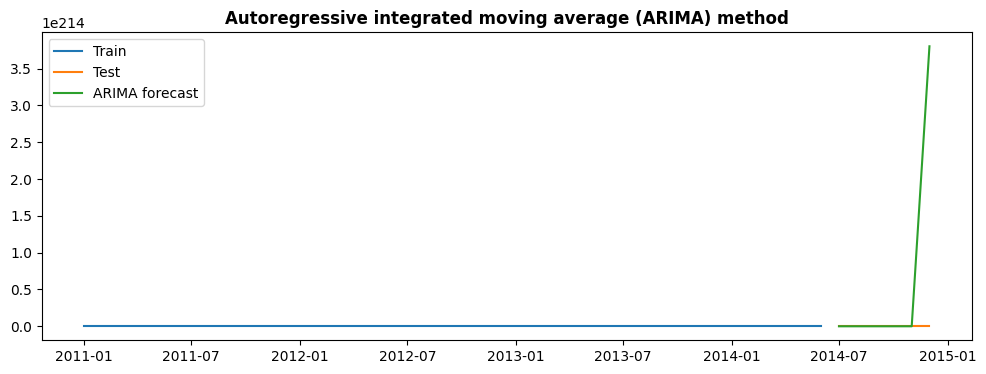

In [ ]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_arima['arima_forecast'][test.index.min():], label='ARIMA forecast')
plt.legend(loc='best')
plt.title('Autoregressive integrated moving average (ARIMA) method', fontweight='bold')
plt.show()

### Calculate RMSE and MAPE

In [ ]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_arima['arima_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_arima['arima_forecast'][test.index.min():])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Autoregressive integrated moving average (ARIMA) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,18774.05,2.686000e+01
0,Simple average method,30846.00,3.818000e+01
0,Simple moving average forecast,22019.48,2.755000e+01
0,Simple exponential smoothing forecast,22824.62,2.770000e+01
0,Holt's exponential smoothing method,15014.67,2.347000e+01
0,Holt Winters' additive method,10350.33,1.377000e+01
0,Holt Winters' multiplicative method,9585.23,1.669000e+01
0,Autoregressive (AR) method,15498.94,2.726000e+01
0,Moving Average (MA) method,52917.91,8.167000e+01
0,Autoregressive moving average (ARMA) method,50776.01,7.769000e+01


### Seasonal auto regressive integrated moving average (SARIMA)

- SARIMA Model has both non seasonal elements and seasonal elements.
- SARIMA brings all the features of an ARIMA model with an extra feature - seasonality.
- SARIMA has six parameters along with seasonality.

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(train_data_boxcox, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
model_fit = model.fit()
print(model_fit.params)

ar.L1      -0.100691
ma.L1      -0.993944
ar.S.L12   -0.394292
ma.S.L12   -0.985537
sigma2      0.047574
dtype: float64


### Recover original time series forecast

In [ ]:
y_hat_sarima = data_boxcox_diff.copy()
y_hat_sarima['sarima_forecast_boxcox'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_sarima['sarima_forecast'] = np.exp(y_hat_sarima['sarima_forecast_boxcox'])

### Plot train, test and forecast

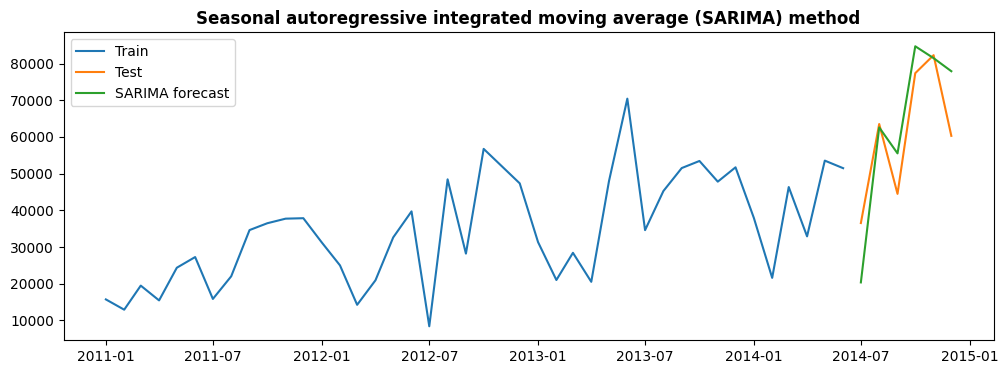

In [ ]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_sarima['sarima_forecast'][test.index.min():], label='SARIMA forecast')
plt.legend(loc='best')
plt.title('Seasonal autoregressive integrated moving average (SARIMA) method',fontweight='bold')
plt.show()

####  The forecast captured both trend and seasonality

### Calculate RMSE and MAPE

In [ ]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_sarima['sarima_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_sarima['sarima_forecast'][test.index.min():])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['(SARIMA) Seasonal autoregressive integrated moving average method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,18774.05,2.686000e+01
0,Simple average method,30846.00,3.818000e+01
0,Simple moving average forecast,22019.48,2.755000e+01
0,Simple exponential smoothing forecast,22824.62,2.770000e+01
0,Holt's exponential smoothing method,15014.67,2.347000e+01
0,Holt Winters' additive method,10350.33,1.377000e+01
0,Holt Winters' multiplicative method,9585.23,1.669000e+01
0,Autoregressive (AR) method,15498.94,2.726000e+01
0,Moving Average (MA) method,52917.91,8.167000e+01
0,Autoregressive moving average (ARMA) method,50776.01,7.769000e+01


- ####  Among all the methods done in the ARIMA above, we can conclude that forecast done using SARIMA method  is able to predict the sales closer to the actual values
- ####  RMSE and  MAPE values for this method is the least among all the methods done    

# 6. Conclusion

- ###  Thus we can conclude that,  Holt Winters additive method is the best forecasting method in the smoothing technique
- ### And  SARIMA - Seasonal Autoregressive Integrated moving average is the best method in  ARIMA set of techniques.  